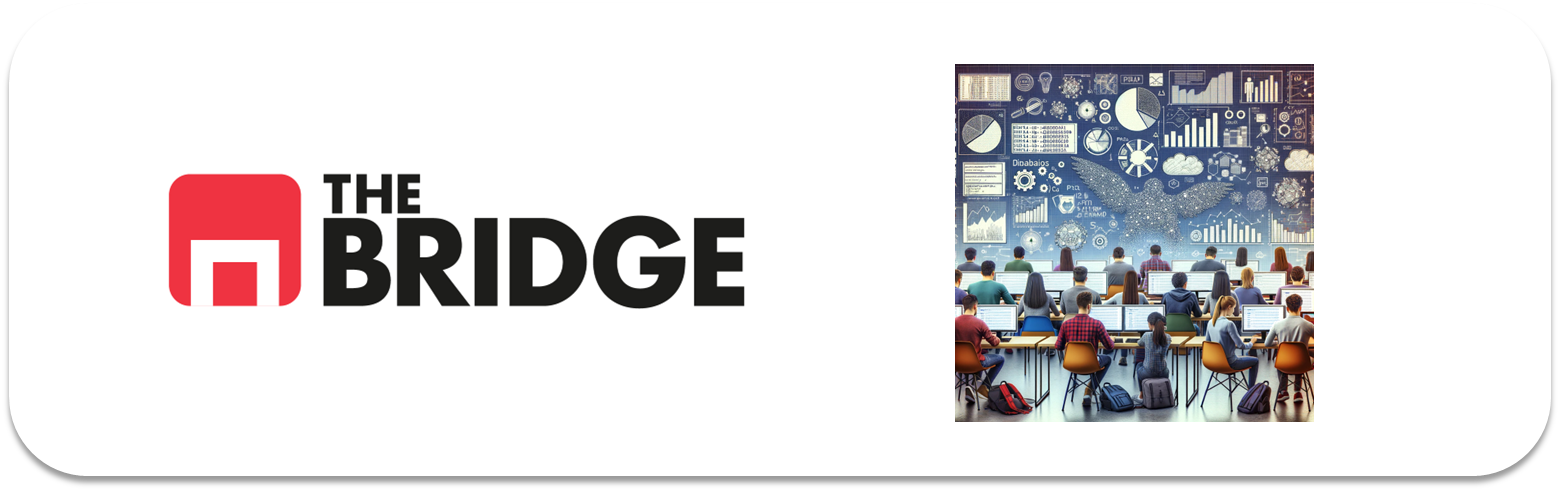

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')

In [3]:
df_t = df_titanic.copy()

In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  


In [5]:
#2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.ºº
columnas_nulos = ['age', 'embarked', 'embark_town'  ]
for column in columnas_nulos:
    df_t[column].fillna(df_t[column]. mode()[0], inplace = True)

In [6]:
# eliminar columnas
df_t.drop(['deck'], axis =1, inplace = True)

In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


Text(0.5, 1.0, 'Distribución de Supervivientes')

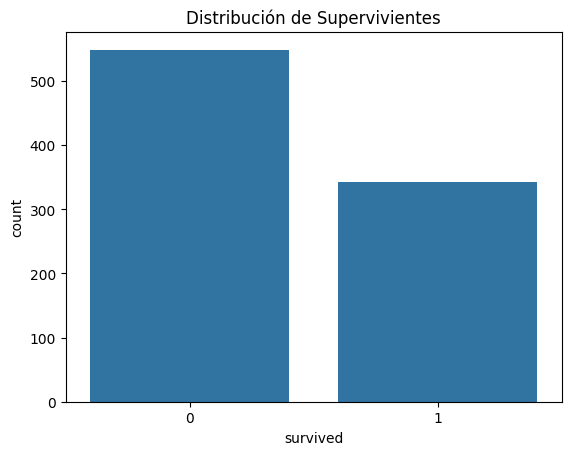

In [12]:
#3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. 
#Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
sns.countplot(x='survived', data=df_t)
plt.title('Distribución de Supervivientes')



In [9]:
#4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un 
#reparto similar de pasajeros embarcados en las tres ciudades.

X = df_t.drop(['survived'], axis=1) #separamos los datos y separamos sin target
y = df_t['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)  

In [10]:
df_eda = X_train.copy() #convierto el eda para el target
df_eda["target"] = y_train.copy()

In [49]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [19]:
# Lista de columnas categóricas a codificar
categorical_columns = ['who', 'embark_town', 'alive', 'class', 'embarked','sex' ]  # Reemplaza con los nombres de tus columnas categóricas

df_encoded = pd.get_dummies(df_t, columns=categorical_columns) # Crear un nuevo DataFrame con codificación one-hot

# Calcular correlaciones
correlations = np.abs(df_encoded.corr()['survived']).sort_values(ascending=False)

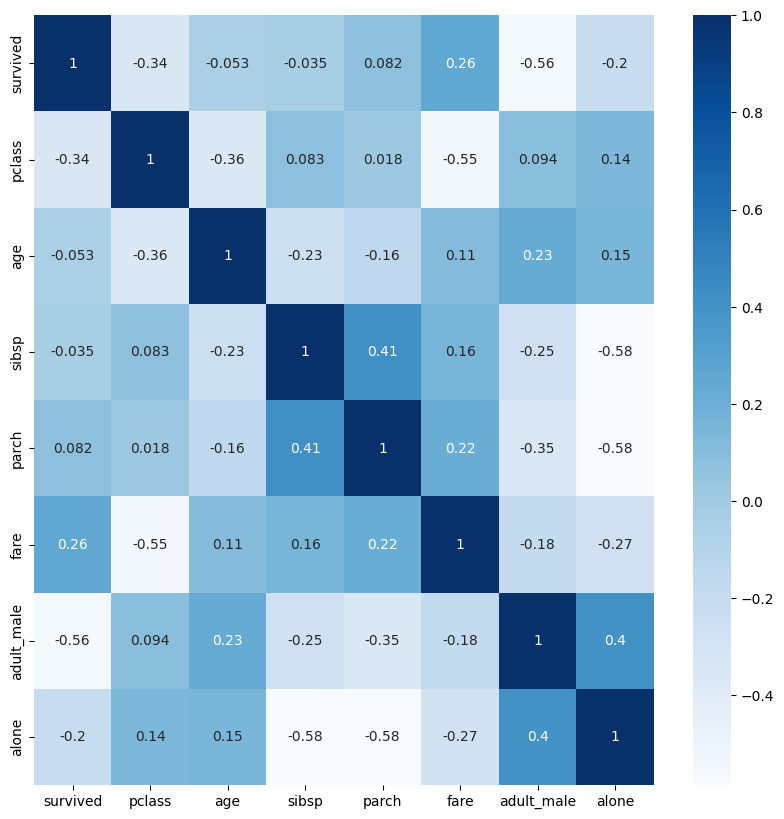

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_t.corr(numeric_only=True), cmap='Blues', annot=True);


In [54]:
numeric_columns = df_t.select_dtypes(include=[np.number]).columns
df_numeric = df_t[numeric_columns]
corr = np.abs(df_numeric.corr().iloc[:, -1]).sort_values(ascending=False)


In [43]:
corr = np.abs(df_eda.select_dtypes(include=['float64', 'int64']).corr()['target']).sort_values(ascending=False)


In [62]:
corr = np.abs(df_eda.corr()['target']).sort_values(ascending=False) #creamos matriz de corelaCIÓN

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = corr[corr < 0.05].index.values #la que no nos gusta es la mayor de 0,05, podemos meter todas las variables y luego poco a poco las podemos ir quitando.
# Filtramos las columnas buenas
df_eda.drop(columns=bad_corr_feat, inplace=True) #quitamos las que tienen poca correlación


ValueError: could not convert string to float: 'male'

In [61]:
# Lista de columnas categóricas a codificar
categorical_columns = ['who', 'embark_town', 'alive', 'class', 'embarked', 'sex']

# Crear un nuevo DataFrame con codificación one-hot
df_encoded = pd.get_dummies(df_eda, columns=categorical_columns)

# Calcular correlaciones
correlations = np.abs(df_encoded.corr()['target']).sort_values(ascending=False)

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = correlations[correlations < 0.05].index.values

# Filtrar las columnas no deseadas
df_eda.drop(columns=bad_corr_feat, inplace=True)

KeyError: "['embarked_Q', 'embark_town_Queenstown'] not found in axis"

In [57]:
df_t.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


C:\Users\enrik\AppData\Local\Temp\ipykernel_28144\4171245062.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(df_numeric.mean(), inplace=True)


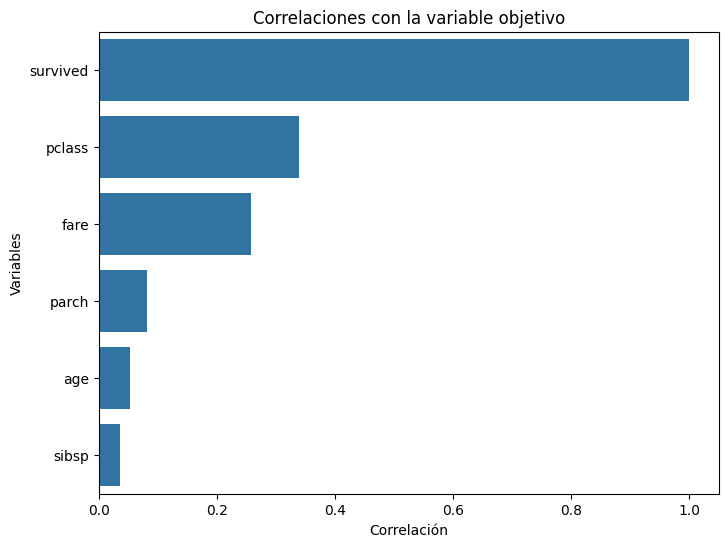

In [68]:



# Lista de columnas categóricas a codificar
categorical_columns = ['who', 'embark_town', 'alive', 'class', 'embarked', 'sex']

# Crear un nuevo DataFrame con codificación one-hot
df_encoded = pd.get_dummies(df_t, columns=categorical_columns)

# Excluir columnas no numéricas
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
df_numeric = df_encoded[numeric_columns]

# Imputar datos faltantes (puedes ajustar la estrategia según tus necesidades)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Calcular correlaciones
corr = np.abs(df_numeric.corr()['survived']).sort_values(ascending=False)


# Visualizar las correlaciones con la variable objetivo
plt.figure(figsize=(8, 6))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlaciones con la variable objetivo')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()


## 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.


## ## 5. Construye las parejas X,y de train y test.

In [72]:

X = df_t.drop('survived', axis=1)  # Features
y = df_t['survived']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df_t['embarked'])
# Dividir el conjunto de datos en entrenamiento y prueba con estratificación



In [73]:
print(df_t['embarked'].value_counts(normalize=True))


embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


In [74]:
print(y_train.value_counts(normalize=True))

survived
0    0.616372
1    0.383628
Name: proportion, dtype: float64


In [75]:
print(y_test.value_counts(normalize=True))

survived
0    0.615672
1    0.384328
Name: proportion, dtype: float64


## 6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

In [81]:
# He limpiado el dataset, prefiero verlo en clase que no lo entiendo bien

#esto lo he buscado
means = X_train.mean()
modes = X_train.mode().iloc[0]

# Imputa los valores nulos con medias y modas
X_train_imputed = X_train.fillna(means)
X_test_imputed = X_test.fillna(means)



TypeError: Could not convert ['femalefemalemalemalefemalemalemalemalemalemalemalemalemalefemalefemalemalefemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalemalemalemalefemalefemalemalemalemalefemalemalefemalefemalefemalefemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalefemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalefemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalefemalemalemalemalemalemalemalefemalemalemalemalefemalefemalefemalefemalefemalemalemalemalefemalefemalemalemalemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalefemalefemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalefemalemalemalemalemalemalefemalemalefemalemalemalefemalefemalefemalemalemalefemalemalemalemalemalemalemalemalefemalefemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalemalemalefemalefemalemalemalemalefemalemalefemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalefemalemalefemalemalemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalemalefemalemalemalemalefemalemalemalefemalemalefemalefemalemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalefemalemalefemalemalemalemalefemalemalefemalemalemalefemalefemalemalemalemalemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalefemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalemalefemalefemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalemalefemalefemalemalemalemalefemalemalemalefemalefemalemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalemalefemalemalemalemalemalemalemalemalemalefemalefemalemalefemalefemalemalefemalemalefemalefemalefemalefemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalefemalemale'
 'SSSSSSSSSSSSSSSCSSSSSSSSSSSSCCSSSQSSSSSSQSCCCSSSSCSSSSSCSSSSCCSSSSQCSQSSSCQCSSSSSSSQCSSQCSSSQSSSSSSSSSSSCSCSCCQQCSSSCSSSCSCCSSCSSCSSSCSQSSCSSSSSSSSSSSSSSCCCQSSSCSSCSSSSCCSCSSSSSCQSSCSSSSSCCSSSSSSSSSSQSSSSSSSSSSSCSSCCSSSSSSQSSCSSSSCCCSSSSSCQSQSSCSCCSSSQCSCSCCSSSSSSSSCCSSSSSSCSSSCSCSSSSCQSSSSCCSSCCQCQSSCSSSSQSSCCSSSSSCSSSCSSSSSCSSSCQSSQSSSSQSCSSSSSCCQSSSQCSSSSSSSSSSSSSSSSCSCSQSQSSSQSSSSQSSSSQCSSSSSSSCSCSQCSSSSQSSCSSSSSCSSCSSSSSSSCCSSSCCQSSSQSSQSSCSSSQSSSSSSSSQCSSSCQCSSSSSSCSSQSSSCSSQSSSSSSSSQSSSSSQSSSCSSSSSSSCSQSSSSCSSSSSCCSSQQCSSSSSCCQSCSCQSSSSSSSSSSSSSSCSSSSSQCSSCSSQSSCCSQCSSSSSSSSCSSSSSQCCSSCSSSCSSQSSSSSSSSSSSSSSSS'
 'ThirdThirdThirdThirdFirstFirstThirdThirdSecondThirdThirdSecondSecondFirstThirdThirdThirdSecondSecondSecondThirdThirdThirdFirstSecondFirstSecondSecondFirstFirstFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdThirdFirstFirstFirstThirdThirdSecondThirdThirdFirstSecondThirdThirdSecondThirdFirstFirstFirstThirdThirdThirdThirdSecondFirstThirdSecondThirdFirstSecondThirdFirstSecondSecondSecondThirdThirdFirstThirdThirdFirstThirdFirstFirstThirdFirstSecondThirdFirstSecondThirdThirdFirstThirdFirstSecondSecondThirdFirstSecondFirstThirdThirdSecondFirstThirdThirdThirdFirstThirdThirdThirdSecondThirdThirdThirdThirdFirstFirstSecondSecondFirstThirdThirdFirstThirdThirdFirstThirdThirdFirstThirdThirdThirdFirstFirstThirdSecondThirdThirdThirdThirdFirstThirdThirdFirstSecondThirdThirdThirdSecondThirdSecondThirdThirdSecondFirstThirdFirstThirdSecondFirstThirdFirstThirdFirstThirdSecondThirdFirstThirdThirdThirdThirdFirstSecondFirstFirstThirdThirdThirdSecondFirstThirdThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdFirstThirdSecondThirdSecondThirdSecondSecondFirstFirstFirstSecondThirdSecondThirdThirdThirdFirstSecondThirdFirstThirdThirdThirdThirdThirdThirdThirdThirdSecondThirdFirstFirstThirdThirdThirdThirdFirstFirstFirstThirdSecondThirdThirdThirdThirdSecondThirdThirdSecondFirstSecondThirdThirdThirdThirdSecondThirdFirstThirdThirdThirdThirdFirstThirdThirdThirdFirstSecondSecondSecondThirdThirdFirstThirdSecondFirstThirdFirstFirstSecondFirstThirdThirdThirdThirdThirdSecondFirstSecondSecondThirdThirdFirstFirstThirdThirdThirdFirstFirstSecondThirdThirdThirdFirstThirdSecondThirdSecondThirdThirdThirdFirstThirdThirdThirdThirdFirstThirdThirdSecondThirdThirdThirdThirdThirdSecondThirdThirdThirdThirdFirstThirdFirstSecondThirdThirdFirstThirdThirdThirdThirdThirdSecondThirdFirstThirdThirdSecondThirdSecondThirdSecondFirstThirdThirdThirdFirstThirdThirdThirdSecondThirdFirstSecondThirdFirstFirstThirdThirdThirdThirdSecondThirdThirdFirstThirdThirdThirdSecondFirstThirdThirdFirstThirdSecondThirdThirdThirdThirdSecondThirdSecondThirdThirdThirdFirstThirdThirdSecondThirdThirdThirdSecondThirdThirdSecondFirstSecondFirstThirdThirdThirdSecondFirstThirdThirdThirdThirdThirdThirdFirstSecondThirdThirdFirstFirstThirdThirdFirstFirstThirdFirstThirdThirdThirdThirdFirstFirstFirstThirdThirdFirstFirstThirdThirdFirstThirdThirdThirdThirdThirdSecondThirdFirstThirdThirdSecondThirdThirdThirdSecondThirdSecondFirstThirdThirdThirdFirstFirstThirdSecondThirdThirdSecondFirstThirdSecondSecondThirdThirdFirstThirdThirdThirdSecondThirdThirdThirdFirstFirstThirdFirstSecondFirstThirdThirdThirdSecondThirdThirdThirdFirstSecondThirdThirdThirdFirstThirdFirstThirdThirdThirdThirdThirdThirdSecondThirdFirstThirdFirstSecondSecondSecondFirstFirstSecondFirstThirdThirdFirstFirstFirstThirdSecondThirdThirdFirstThirdSecondFirstSecondFirstSecondFirstThirdThirdSecondSecondThirdThirdSecondThirdSecondThirdSecondThirdFirstFirstThirdThirdThirdThirdSecondFirstFirstSecondThirdThirdSecondFirstThirdFirstFirstSecondFirstFirstThirdThirdThirdThirdThirdFirstFirstThirdThirdFirstThirdSecondFirstThirdSecondThirdFirstThirdThirdFirstFirstThirdThirdThirdFirstThirdFirstThirdThirdSecondThirdThirdThirdFirstSecondThirdSecondFirstThirdThirdThirdThirdSecondFirstThirdSecondFirstSecondSecondThirdThirdSecond'
 'womanwomanmanmanwomanmanmanchildchildmanmanmanmanwomanchildmanwomanmanmanwomanmanmanmanmanwomanmanmanmanmanmanmanmanmanwomanchildchildmanmanmanwomanmanmanwomanwomanmanmanmanmanchildwomanmanmanchildmanmanwomanwomanmanmanmanwomanmanwomanwomanwomanwomanmanmanwomanmanmanwomanmanwomanwomanmanmanwomanchildmanmanmanwomanmanwomanmanmanwomanmanmanmanmanwomanwomanmanmanchildmanwomanmanmanmanmanmanwomanmanmanwomanwomanchildmanmanmanmanmanmanmanmanwomanmanmanmanmanmanwomanmanmanchildmanwomanmanmanwomanwomanwomanwomanwomanmanchildmanmanwomanwomanmanmanmanmanmanchildwomanmanmanmanchildwomanwomanwomanwomanmanmanmanchildwomanmanmanmanmanmanwomanmanmanwomanmanmanmanmanmanmanwomanwomanmanmanwomanmanmanchildwomanmanmanmanmanwomanmanmanmanmanmanchildwomanchildmanwomanwomanmanwomanwomanwomanmanchildmanmanwomanwomanwomanwomanmanmanmanmanmanwomanmanwomanmanmanwomanwomanwomanmanmanwomanmanmanmanmanmanmanmanwomanwomanmanmanmanwomanmanwomanmanchildchildmanmanwomanwomanmanwomanchildmanmanwomanmanwomanchildmanwomanmanmanmanwomanwomanmanmanmanwomanmanwomanmanmanmanchildmanmanwomanmanwomanmanmanmanmanmanchildmanwomanmanmanwomanmanmanmanwomanwomanwomanmanwomanmanmanmanmanmanwomanwomanmanwomanmanmanwomanwomanwomanmanwomanchildwomanmanmanchildmanmanmanmanwomanmanmanmanwomanmanmanmanmanmanmanwomanmanmanmanmanmanmanwomanwomanwomanmanmanmanmanwomanmanmanmanmanwomanwomanwomanwomanmanwomanmanmanmanchildwomanwomanmanchildchildwomanmanwomanmanwomanwomanmanchildmanmanmanwomanmanmanwomanmanwomanwomanchildwomanmanmanmanwomanwomanmanmanchildwomanmanmanmanmanmanmanchildmanmanwomanchildmanwomanmanmanmanchildmanwomanmanmanwomanwomanmanmanmanmanmanmanwomanwomanmanmanmanmanwomanwomanmanmanmanwomanmanwomanwomanchildmanwomanchildmanmanmanwomanmanmanmanmanmanwomanmanmanwomanmanmanchildmanmanchildwomanmanmanwomanmanmanwomanmanmanwomanmanmanmanmanmanmanwomanwomanmanchildchildmanmanwomanmanmanmanwomanwomanmanmanwomanmanmanmanmanwomanmanwomanmanmanmanmanwomanmanmanmanwomanmanmanwomanmanmanchildmanmanwomanwomanmanmanmanwomanmanmanwomanwomanmanwomanwomanwomanmanmanmanwomanmanmanmanmanmanmanwomanmanwomanmanwomanwomanchildmanwomanmanwomanmanmanmanmanmanmanmanmanchildwomanmanwomanwomanmanwomanmanwomanwomanwomanchildwomanmanmanmanmanmanmanmanmanmanwomanmanwomanmanwomanmanchildmanmanwomanmanwomanwomanchildchildwomanmanchildmanmanmanchildmanchildmanmanwomanwomanmanmanwomanwomanman'
 'SouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgQueenstownQueenstownCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonQueenstownSouthamptonSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonCherbourgSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonCherbourgCherbourgQueenstownCherbourgQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonQueenstownSouthamptonQueenstownSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonCherbourgQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgSouthamptonSouthamptonQueenstownQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgCherbourgQueenstownSouthamptonCherbourgSouthamptonCherbourgQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonCherbourgCherbourgSouthamptonQueenstownCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonQueenstownCherbourgCherbourgSouthamptonSouthamptonCherbourgSouthamptonSouthamptonSouthamptonCherbourgSouthamptonSouthamptonQueenstownSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthamptonSouthampton'
 'noyesnonoyesyesnonoyesnononoyesyesnononononoyesnononoyesyesnononononoyesnonoyesyesyesnonononononoyesyesnonoyesnonoyesnoyesnononoyesyesnoyesnononoyesyesnoyesnonoyesnonononoyesnoyesnononoyesyesnoyesnoyesnonoyesnoyesnonoyesyesnoyesnoyesnoyesnononoyesyesnonoyesnoyesnonononononoyesnononoyesnoyesyesyesnonoyesnoyesnononoyesyesyesyesnoyesnonoyesyesnononononoyesyesnononoyesyesyesnoyesyesnoyesnoyesnoyesnononoyesnonoyesnoyesnoyesnoyesyesnonoyesyesnonoyesnononononoyesnonononononoyesnonoyesyesnoyesyesyesnonononoyesyesyesyesnononononoyesnoyesnonoyesyesyesnononononoyesnoyesnonoyesyesnononoyesnoyesnoyesnononoyesyesnoyesyesnoyesnononoyesnoyesnonoyesyesyesnononoyesnoyesnonoyesyesnonoyesnoyesnononoyesnonononononoyesyesnonoyesnoyesnoyesnonononononoyesnoyesnonoyesnononoyesyesyesnoyesyesyesnononoyesnonoyesyesnonononononoyesnonononononoyesyesnonononoyesyesyesnononoyesnoyesyesnononononononoyesnonoyesyesnononoyesyesnonononoyesyesnonoyesnonoyesnononononoyesyesnonoyesyesnonononononoyesyesnoyesyesnononononononoyesnoyesyesyesnonononononoyesyesnononoyesyesyesyesnonoyesnonoyesyesyesyesyesnonoyesnononononononononoyesyesnoyesnonoyesyesnonoyesnonoyesnonoyesnoyesyesnononoyesyesnononononoyesnononoyesnononoyesyesnoyesyesnoyesnoyesnoyesnononononoyesnonoyesnonononoyesyesyesnononoyesnonoyesyesnonoyesyesnononoyesyesnononononoyesnoyesyesyesnononoyesnoyesnonononononononoyesyesyesyesyesnononoyesyesyesyesyesnonoyesnonoyesnononoyesyesnoyesnononononoyesnononoyesyesyesyesyesnononononoyesyesnonoyesnononoyesno'] to numeric

## 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

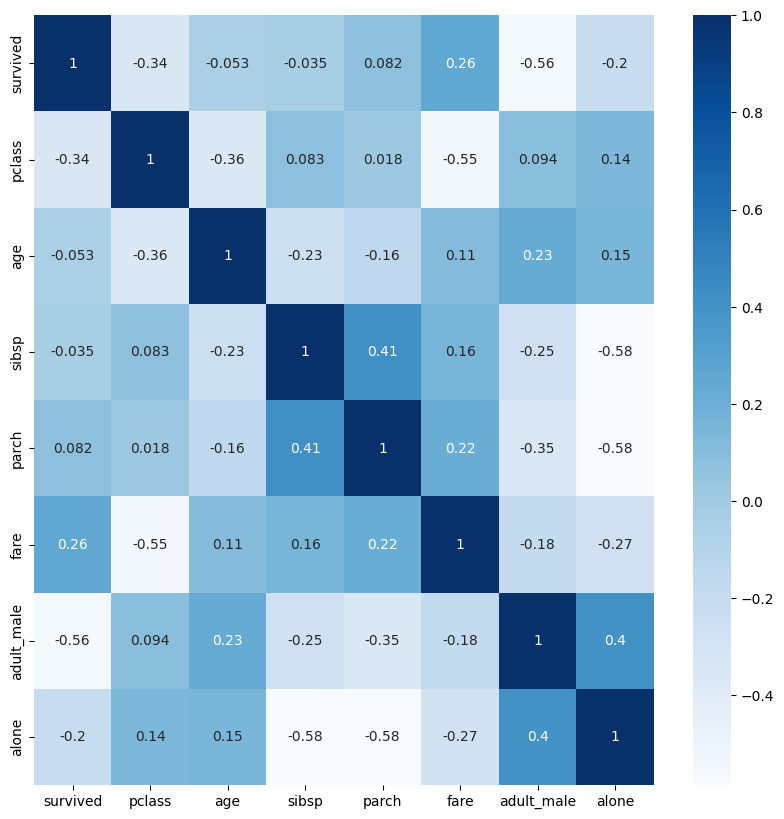

In [82]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_t.corr(numeric_only=True), cmap='Blues', annot=True);


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>, <Axes: >]], dtype=object)

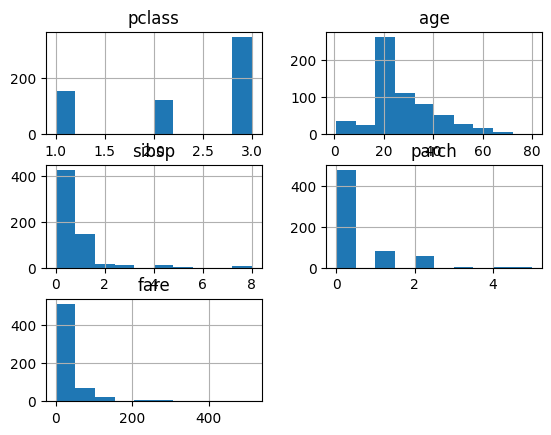

In [102]:

X_train.hist()


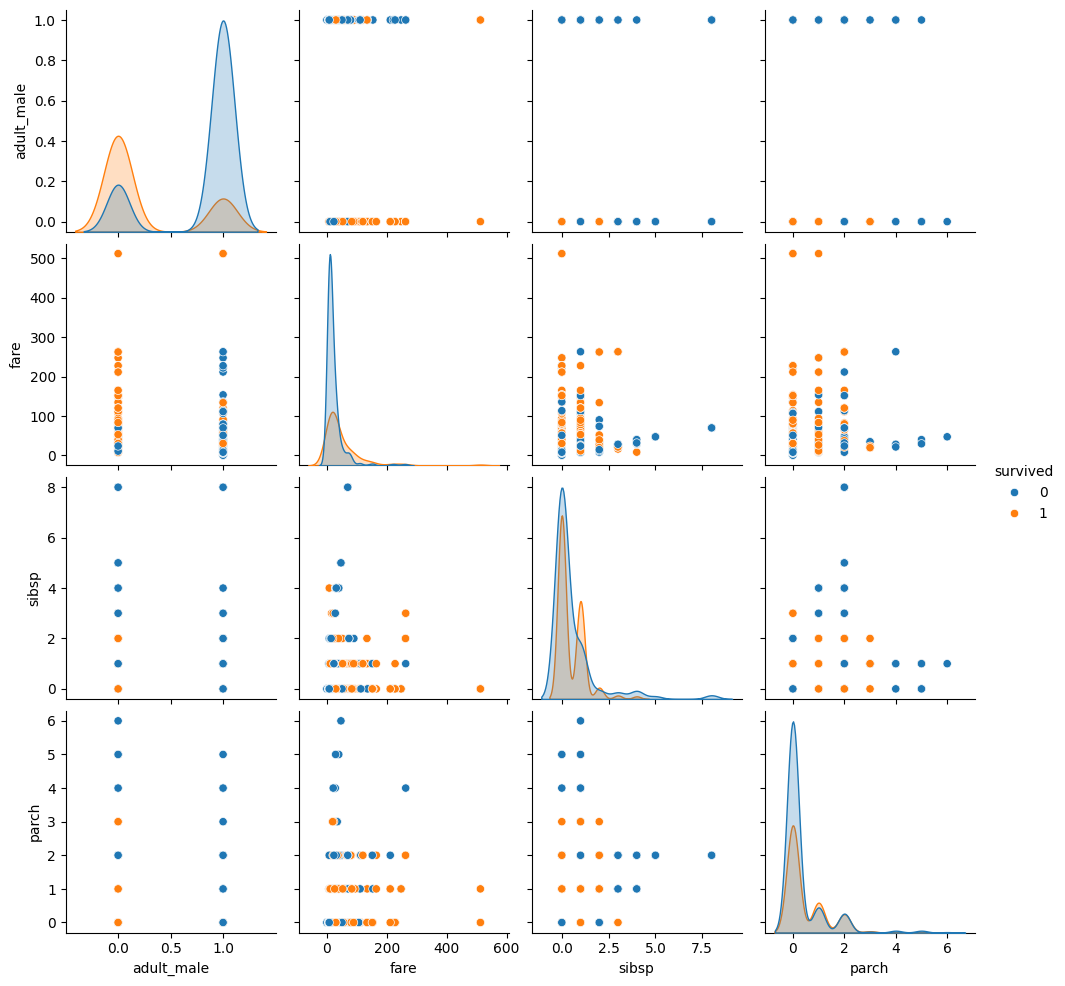

In [96]:
variables_pairplot = ["adult_male", "fare", "sibsp", "parch", "survived"]

sns.pairplot(df_t[variables_pairplot], hue="survived")

plt.show()

## 9. Construye un modelo de regresión logística.

In [104]:
from sklearn import metrics
# Codificación one-hot de las variables categóricas en X_train y X_test
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Crear y ajustar el modelo ElasticNet
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train_encoded, y_train)

# Evaluar el rendimiento del modelo en los conjuntos de entrenamiento y prueba
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train_encoded)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test_encoded)))


Train MSE: 0.2199
Test MSE: 0.2207


In [105]:
#en la limpieza de datos no me dejha cambiar los valores
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

ValueError: could not convert string to float: 'female'

In [98]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

ValueError: could not convert string to float: 'female'

In [99]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test))

SyntaxError: incomplete input (348070650.py, line 5)

In [ ]:
#me he perdido, prefiero verlo todo en clase, porque lo entiendo peor que la otra práctica

## 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.


In [107]:
for col in features:
    train_set[col] = train_set[col].apply(np.log)
train_set[features].hist()

NameError: name 'features' is not defined


+
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  
